<a href="https://colab.research.google.com/github/KMVALLI/Realtime-Data-science-projectsb/blob/main/PAN_Card_Tempering_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The purpose of this project is to detect Tampering of the PAN card using Computer vision . This project will help different organizatin  ,detecting wheather the ID i.e  the PAN card providded to them by their employes or coustomer or anyone is original or not 

1) Get the image from the User
2)check size and formate of the image  what user providede 
3)Change the shape and size of the image according to the original image 
4)Covert the image to grayScale
5)find the similarity index of the images
6)finding the thershold of the image 
7)finding the contour  using IMUTILS
8)Draw or create  a boundering rectangle using  these contoure 
9)plot the difference and threshold original and tampered image 
10)compare all the images and check similarity score to decide the tampering




In [77]:
# find out the structure similarity of original PAN card and pancard  upladed bu the user 

In [78]:
# import necessary packages
from skimage.metrics  import structural_similarity  # it will help us to find  out image structural similarity  score   , 
import imutils # it help us to grabing the Contoure of the images 
import cv2 # this is for computer vision  for the all the image processing requirements 
from  PIL import Image # this used  for downloading the image and visuvalizing the image 
import requests # this is used to fetch the data from the url 


In [79]:
#create a  directory  for storing the images
!mkdir pan_card_tampered_images
!mkdir pan_card_tampered_images/image

mkdir: cannot create directory ‘pan_card_tampered_images’: File exists
mkdir: cannot create directory ‘pan_card_tampered_images/image’: File exists


In [80]:
# open the image  through internet and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream =True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream =True).raw) 

## Load the both images original , and tampared imageses 

check original image of the pan card formate , hight and width , pixels then convert tamapred image as for the original image 

In [81]:

# the file fomate of the file 
print("Original Image formate ", original.format)
print("Tampered image format", tampered.format)
 

Original Image formate  JPEG
Tampered image format PNG


In [82]:
# check image size in pixels
print("Original image size",original.size)
print("Tampered image size ", tampered.size)

Original image size (1200, 800)
Tampered image size  (282, 179)


In [83]:
# conver the tampered image similar to original image either jpg or png  etc...
original = original.resize((250,160))  #height width
print(original.size)
tampered = tampered.resize((250,160))
print(tampered.size)

 



(250, 160)
(250, 160)


In [84]:
# then save the tampered image after resizing the image in perticular directory 
original.save('pan_card_tampered_images/image/original.png') 
tampered.save('pan_card_tampered_images/image/tampered.png') # just change the formate what you want insted of png 


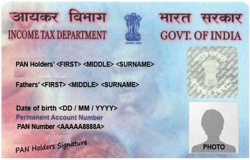

In [85]:
# original image 
original

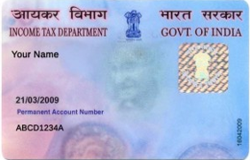

In [86]:
tampered

## Then will compare the both images using CV2

In [87]:
# load the two images using Imread it is from CV2
original =cv2.imread('pan_card_tampered_images/image/original.png')
tempered = cv2.imread('pan_card_tampered_images/image/tampered.png')

## Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel. 

In [88]:
#read the image using opencv then convert in to gray scale 
original_gry = cv2.cvtColor(original ,  cv2.COLOR_BGR2GRAY)
tampered_gry = cv2.cvtColor(tempered ,   cv2.COLOR_BGR2GRAY)

In [89]:
original_gry

array([[254, 254, 253, ..., 253, 252, 254],
       [254, 251, 249, ..., 249, 249, 252],
       [253, 249, 252, ..., 249, 248, 251],
       ...,
       [249, 229, 217, ..., 190, 200, 238],
       [251, 249, 246, ..., 238, 241, 247],
       [253, 254, 253, ..., 255, 254, 253]], dtype=uint8)

#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [90]:
# computing the structurall similarity Index (SSIM) between the two images , ensuring that the difference  image is returened 
(score, diff) = structural_similarity(original_gry,tampered_gry,full=True)
diff = (diff * 255).astype("uint8") #  i diveded  for the image narmalizing means equal size as 255  and mention as datypeb as unit8
print("structural_similarity: {} ".format(score))

structural_similarity: 0.31678790332739426 


In [91]:
#  hear only 31 %  is macthing rest of the things are not matching  , so for we con't decide this is tampared are not we need to check other ways also 

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula. in baground 
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [92]:
# claculating the threshold and contoures
thresh = cv2.threshold(diff,  0 ,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] 
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

In [93]:
#loop over the contours
for c in cnts:
  #applying the contours on image 
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w , y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w , y+h),(0,0,255),2)


error: ignored

original formate image


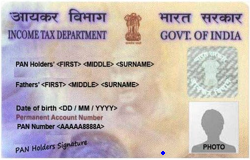

In [94]:
# display the original image with contour it means with colour photo
print('original formate image')
Image.fromarray(original)

In [95]:
# display the tampered image with contour it means with colour photo
print('original formate image')
Image.fromarray(tampered)

original formate image


AttributeError: ignored

Different Image


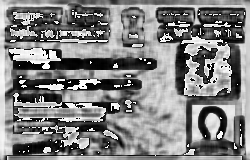

In [96]:
# if we not abale to understad the difference  with contour go for black and white 
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff) # diff --> it will show the difference 

Threshold Image


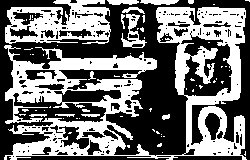

In [97]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

In [98]:
# differnce is in the black colour 

#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 
#### As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  

#### This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.